In [2]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Estimation

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [3]:
#We looked at SB data from 2020 on Wages of SB City Government Employees
sb = Table.read_table('santa_barbara_2020.csv').select(0, 1, 4)
sb.set_format('TotalWages', NumberFormatter(0))
sb = sb.where('TotalWages', are.above(10000))
sb.show(3)

DepartmentOrSubdivision,Position,TotalWages
Administrative Services,Applications Administrator,"112,270"
Administrative Services,Applications Analyst,"109,961"
Administrative Services,Applications Analyst,"107,557"


In [8]:
fiftieth = percentile(50, sb.column('TotalWages'))
fiftieth

80383

In [9]:
median = np.median(sb.column('TotalWages'))
median

80393.0

#### What is the difference between percentile and median?

c:\users\nguebels\appdata\local\programs\python\python39\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


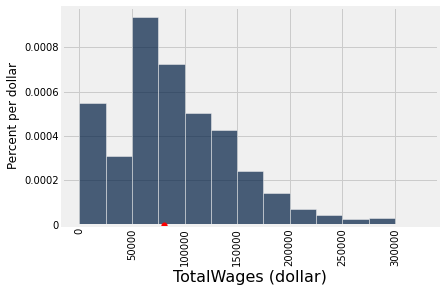

In [10]:
#Let's look at the population distribution
sb.hist('TotalWages', bins=comp_bins, unit="dollar")
plots.scatter(median, 0, color='red', s=30, zorder=3)


In [ ]:
# Here we have the whole population, but if we were not able to get the whole population
# We would get a sample

In [22]:
sample_from_population = sb.sample(200, with_replacement=False)
sample_from_population.show(3)

DepartmentOrSubdivision,Position,TotalWages
Community Development,Plans Examiner,"107,530"
City Attorney,Assistant City Attorney IV,"227,530"
Parks & Recreation,Grounds Maintenance Worker I,"14,316"


In [23]:
#What is the median and 50%ile of this sample?
percentile(50, sample_from_population.column('TotalWages'))

78721

In [33]:
#What is the true percentile
percentile(50, sb.column('TotalWages'))

80383

In [ ]:
np.median(sample_from_population.column('TotalWages'))

What is the difference between the median and the 50th percentile?

If we keep drawing samples like this over and over again from the population, how close are we to the true parameter?  Is there a pattern that emerges? Can we capture this uncertainty in the way we describe our findings?

In [27]:
#Let's simulate this!
medians = make_array()
repetitions = np.arange(100)
for i in repetitions:
    sample = sb.sample(200, with_replacement=False)
    median = np.median(sample.column('TotalWages'))
    medians = np.append(medians, median)


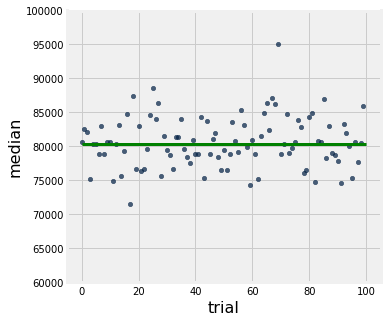

In [28]:
#Visualize the variability of our estimate in a scatterplot 
parameter = np.median(sb.column('TotalWages')) 

Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')
plots.ylim(60000, 100000)
plots.plot([0,100], [parameter, parameter], 0, color='green', lw=3, zorder=1)

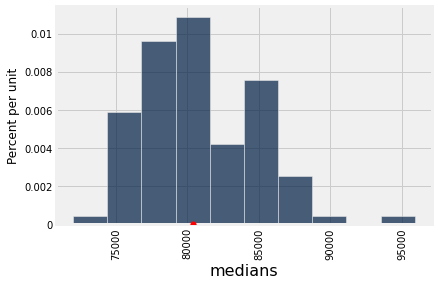

In [34]:
#Visualize the variability of our estimate in a histogram

Table().with_column('medians', medians).hist(0)
plots.scatter(fiftieth, 0, color='red', s=30, zorder=3)

## The Bootstrap

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

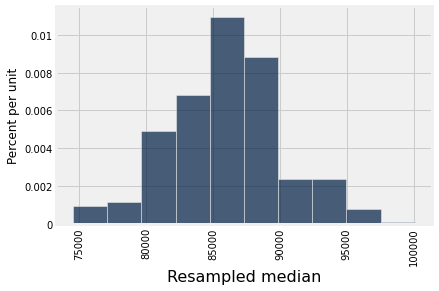

In [13]:
medians = make_array()

for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('TotalWages'))
    medians= np.append(medians, median)
    
Table().with_column('Resampled median', medians).hist()

In [25]:
intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sb.sample(200, with_replacement=False)
    medians =  make_array()
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('TotalWages'))
        medians = np.append(medians, median)
        
    interval_95 = [percentile(2.5, medians),
                   percentile(97.5, medians)]
    
    intervals.append(interval_95)

In [24]:
parameter = np.median(sb.column('TotalWages'))
correct = intervals.where('Lower', are.not_above(parameter)).where('Upper', are.not_below(parameter))
correct.num_rows

92

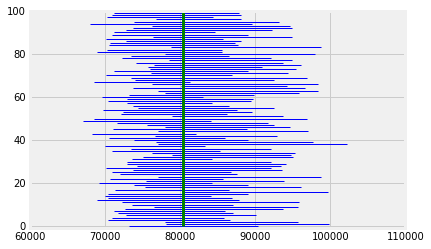

In [26]:
Lower = intervals.column(0)
Upper = intervals.column(1)
plots.ylim(-1, 100)
plots.xlim(60000,110000)

for i in np.arange(100):
    plots.plot([Lower[i], Upper[i]], [i, i], color='blue', lw=1, zorder=1)
plots.plot([parameter, parameter], [0,100], 0, color='green', lw=3, zorder=1)

## Bootstrap: example 2: Mean maternal age

In [29]:
#Remember this table?
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


In [11]:
#TODO: Can we first have a look at the distribution focussing on 'Maternal Age' in this sample?


In [ ]:
#TODO: Can we estimate the average maternal age from this sample?

In [13]:
#TODO: Let's calculate the average/mean birth weight of this sample. Is this a good estimate?
mean_age = ...

In [14]:
#TODO: Let's look at the distribution and add a dot for where the mean is in this sample
...
#plots.scatter(mean_age,0.002,color="red");

This is just a sample , we know that this was a convenience/deterministic sample (we just sampled a convenient group of babies who were born at a specific hospital, etc.).
But let's now assume this is a random sample that represents the population. Can we estimate the average age 
and provide a confidence interval using the bootstrap technique

In [18]:
# Step 1: Resample
#Step 2: Look at the average
# Step 3: Do this many times over (repeat!)
# Step 4: Decide on an acceptable confidence interval for our process (in %)
# Step 5: Look at the data

In [37]:
# TODO: Let's capture this in a simulation and look at the variation in averages



In [15]:
# TODO: Before we look at the data, let's decide on what we an acceptable confidence interval would be (90, 95, 97, 99??)

In [16]:
#TODO: Calculate left and right values for our confidence interval (use percentile)

In [17]:
#TODO: Visualize!!

#plots.plot([left,right], [0,0], color="gold", lw=10, zorder=1);
#plots.scatter(mean_age,0.05,color="blue", zorder=2);
#plots.title('Bootstrap Means (1K Bootstraps from our Sample)');


In [21]:
#TODO: Can we simulate finding a confidence interval 100 times?
intervals = ...

In [20]:
#TODO: Let's visualize just like with SB Wages

